ultralytics는 객체 검출(Object Detection) 및 관련 작업을 위한 머신 러닝 라이브러리 중 하나입니다. 이 라이브러리는 객체 검출 모델을 학습하고 사용하는 데 도움을 주며, 객체 검출 작업을 간단하게 수행할 수 있는 유용한 도구와 함수를 제공합니다.

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.0/618.0 kB 10.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import warnings
from IPython.core.magic import register_line_cell_magic
import yaml
from PIL import Image
import os
import seaborn as sns
from ultralytics import YOLO
from matplotlib.patches import Rectangle
import glob
import cv2
import matplotlib.pyplot as plt

In [ ]:
warnings.filterwarnings("ignore")

np.random.seed(12345)

%matplotlib inline

!wandb disabled

/bin/bash: line 1: wandb: command not found


In [ ]:
INPUT_DIR = "/content/drive/MyDrive/kaggle_halmat_data/css-data"
WORK_DIR = "/content/drive/MyDrive/kaggle_halmat_data/results_yolov8n_100e/kaggle/working"

In [ ]:
num_classes = 10
classes = ["Hardhat", "Mask", "NO-Hardhat", "NO-Mask", "NO-Safety Vest", "Person", "Safety Cone", "Safety Vest", "machinery", "vehicle"]

In [ ]:
dict_file = {'train': os.path.join(INPUT_DIR, 'train'),
             'val': os.path.join(INPUT_DIR, 'valid'),
             'test': os.path.join(INPUT_DIR, 'test'),
             'nc': num_classes,
             'names': classes
            }

with open(os.path.join(WORK_DIR, 'data.yaml'), 'w+') as file:
    yaml.dump(dict_file, file)

In [ ]:
class_idx = {str(i):classes[i] for i in range(num_classes)}

class_stat = {}
data_len = {}

for mode in ['train', 'valid', 'test']:

    class_count = {classes[i]:0 for i in range(num_classes)}

    path = os.path.join(INPUT_DIR, mode, 'labels')

    for file in os.listdir(path):

        with open(os.path.join(path, file)) as f:
            lines = f.readlines()

            for cls in set([line[0] for line in lines]):
                class_count[class_idx[cls]] += 1

    data_len[mode] = len(os.listdir(path))
    class_stat[mode] = class_count

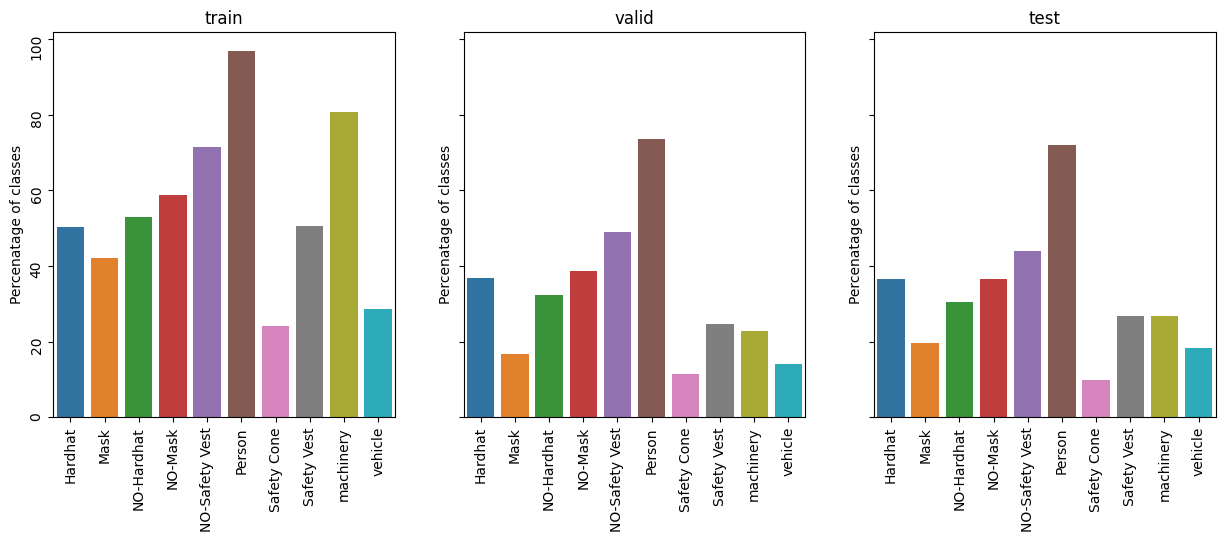

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15, 5), sharey=True)

for i, mode in enumerate(['train', 'valid', 'test']):
    sns.barplot(pd.DataFrame({mode:class_stat[mode]}).T/data_len[mode]*100, ax=ax[i])
    ax[i].set_title(mode)
    ax[i].tick_params(rotation=90)
    ax[i].set_ylabel('Percenatage of classes')
plt.show()

In [ ]:
# 이미지 sizd 체크

for mode in ['train', 'valid', 'test']:
    print(f'\nImage sizes in {mode} set:\n')
    img_size = 0
    for file in glob.glob(os.path.join(INPUT_DIR, mode, 'images', '*')):
        image = Image.open(file)
        if image.size != img_size:
            print(f'\t{image.size}')
            img_size = image.size


Image sizes in train set:

	(640, 640)

Image sizes in valid set:

	(640, 640)

Image sizes in test set:

	(640, 640)


In [ ]:
for mode in ['train', 'valid', 'test']:

    files =  glob.glob(os.path.join(INPUT_DIR, mode, 'images', '*'))

    print(f'{mode} set size: {len(files)}\n')

train set size: 2605

valid set size: 114

test set size: 82



In [ ]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 77.7MB/s]


In [ ]:
# train

model.train(data=os.path.join(WORK_DIR, 'data.yaml'),
            task='detect',
            imgsz=640,
            epochs=30,
            batch=32,
            mode='train',
            name='yolov8n_v1_train')

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/kaggle_halmat_data/results_yolov8n_100e/kaggle/working/data.yaml, epochs=30, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_v1_train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=Non

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x780b9d022740>
fitness: 0.474290065267557
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.52334,     0.56325,     0.32424,     0.25608,     0.37776,     0.47407,      0.4677,     0.52034,     0.58643,     0.33552])
names: {0: 'Hardhat', 1: 'Mask', 2: 'NO-Hardhat', 3: 'NO-Mask', 4: 'NO-Safety Vest', 5: 'Person', 6: 'Safety Cone', 7: 'Safety Vest', 8: 'machinery', 9: 'vehicle'}
plot: True
results_dict: {'metrics/precision(B)': 0.8592620034631381, 'metrics/recall(B)': 0.6726913915845552, 'metrics/mAP50(B)': 0.7570498552827069, 'metrics/mAP50-95(B)': 0.4428723108214292, 'fitness': 0.474290065267557}
save_dir: PosixPath('runs/detect/yolov8n_v1_train')
speed: {'preprocess': 3.7294438010767883, 'inf

In [ ]:
model = YOLO('runs/detect/yolov8n_v1_train/weights/best.pt')

In [ ]:
results = model.predict(source=os.path.join(INPUT_DIR, 'test', 'images'), save=True)


image 1/82 /content/drive/MyDrive/kaggle_halmat_data/css-data/test/images/-4405-_png_jpg.rf.82b5c10b2acd1cfaa24259ada8e599fe.jpg: 640x640 1 Hardhat, 1 Person, 35.3ms
image 2/82 /content/drive/MyDrive/kaggle_halmat_data/css-data/test/images/000005_jpg.rf.96e9379ccae638140c4a90fc4b700a2b.jpg: 640x640 2 Hardhats, 2 NO-Masks, 3 Persons, 13.7ms
image 3/82 /content/drive/MyDrive/kaggle_halmat_data/css-data/test/images/002551_jpg.rf.ce4b9f934161faa72c80dc6898d37b2d.jpg: 640x640 2 Hardhats, 1 NO-Mask, 2 NO-Safety Vests, 2 Persons, 11.1ms
image 4/82 /content/drive/MyDrive/kaggle_halmat_data/css-data/test/images/003357_jpg.rf.9867f91e88089bb68dc95947d5116d14.jpg: 640x640 1 Hardhat, 3 NO-Masks, 2 NO-Safety Vests, 1 Person, 1 Safety Cone, 19.7ms
image 5/82 /content/drive/MyDrive/kaggle_halmat_data/css-data/test/images/004063_jpg.rf.1b7cdc4035bcb24ef69b8798b444053e.jpg: 640x640 4 Hardhats, 6 NO-Safety Vests, 7 Persons, 1 Safety Vest, 15.6ms
image 6/82 /content/drive/MyDrive/kaggle_halmat_data/css-

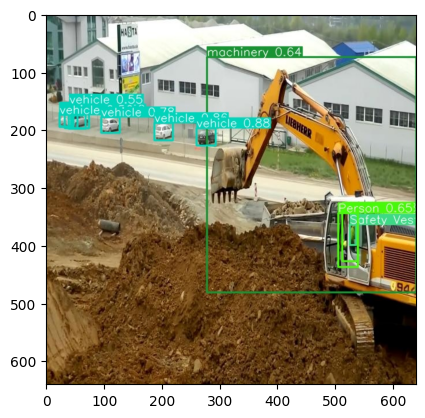

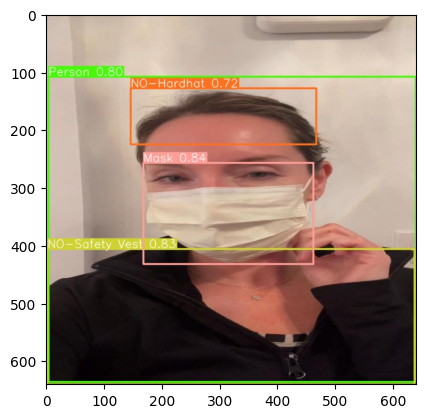

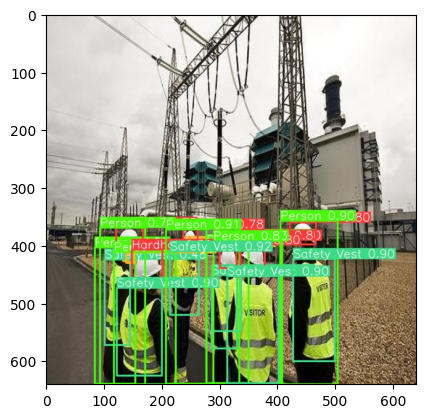

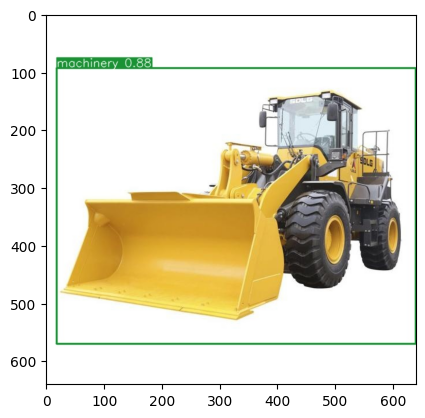

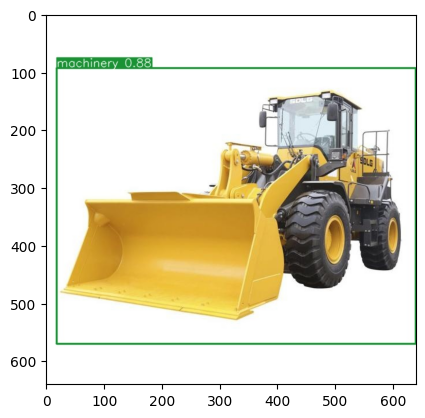

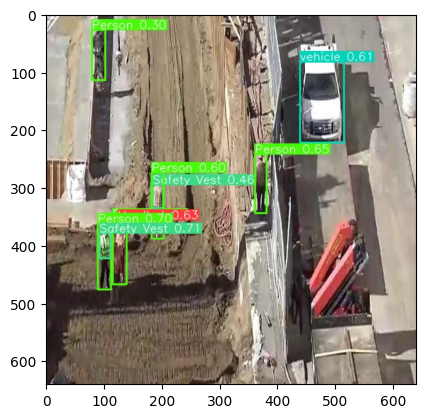

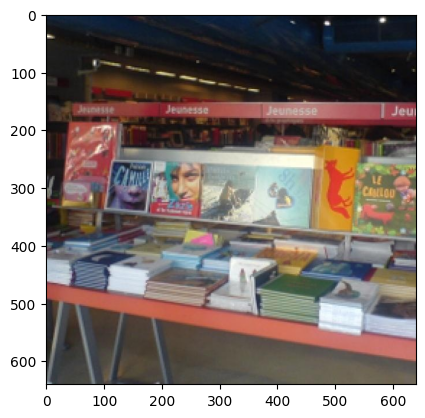

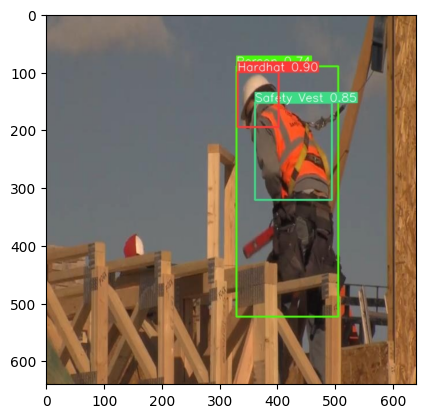

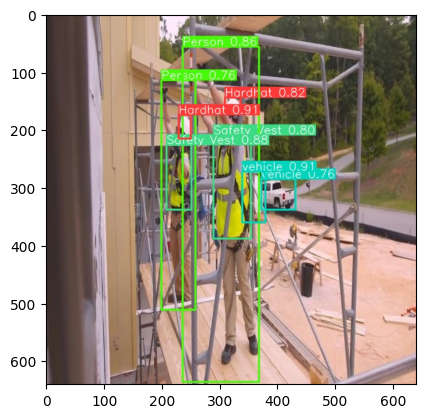

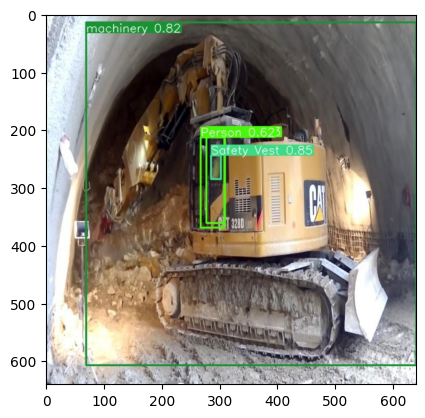

In [ ]:
%matplotlib inline

predicitions = glob.glob(os.path.join('runs/detect/predict', '*'))

n = 10

for i in range(n):
    idx = np.random.randint(1, len(predicitions))
    image = Image.open(predicitions[idx])
    plt.imshow(image)
    plt.grid(False)
    plt.show()

In [ ]:
predicitions = glob.glob(os.path.join('runs/detect/predict', '*'))
len(predicitions)

82